# Conectividad al servicio de Internet
## Análisis exploratorio de datos

#### Fuente de datos: https://datosabiertos.enacom.gob.ar/dataviews/241175/conectividad-al-servicio-de-internet/


In [69]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.options.mode.chained_assignment = None

In [2]:
# Se carga archivo CSV
data = pd.read_csv('ConectividadalserviciodeInternet_edit.csv', encoding= "latin-1")
data.head(3)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,Telefonia Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos MarÃ­a NaÃ³n,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896


### Se realizan cambios estructurales en el DataFrame

#### Corrección de encoding

In [3]:
# Se corrige la codificación en columnas específicas
data['Localidad'] = data['Localidad'].str.encode('latin1').str.decode('utf-8')
data['Partido'] = data['Partido'].str.encode('latin1').str.decode('utf-8')


data.head(3)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,Telefonia Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.0,-35.651193,-60.709896


In [4]:
# Se crea un dataframe para ser modificado
data_df = data

#### Transformación de los datos a binarios

In [5]:
# Se reemplazan valores

data_df = data_df.replace("--", "0")
data_df = data_df.replace("SI", "1")

In [6]:
# Se visualizan los primeros 3 registros
data_df.head(3)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,Telefonia Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,1,1,1,6588010.0,-35.292982,-61.407254
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,0,0,0,0,0,0,1,1,1,6588020.0,-35.239499,-60.825136
2,BUENOS AIRES,9 de Julio,Dudignac,2670,0,0,1,0,0,1,1,1,1,6588040.0,-35.651193,-60.709896


#### Creación columna concatenada Provincia-Partido-Localidad para futuros Merges.

In [7]:
# Se agrega la columna Key_Merge
data_df['Key_Merge'] = data_df['Provincia'] + '-' + data_df['Partido'] + '-' + data_df['Localidad']

In [8]:
data_df.head(3)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,Telefonia Fija,3G,4G,Link,Latitud,Longitud,Key_Merge
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,1,1,1,6588010.0,-35.292982,-61.407254,BUENOS AIRES-9 de Julio-Alfredo Demarchi (Est....
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,0,0,0,0,0,0,1,1,1,6588020.0,-35.239499,-60.825136,BUENOS AIRES-9 de Julio-Carlos María Naón
2,BUENOS AIRES,9 de Julio,Dudignac,2670,0,0,1,0,0,1,1,1,1,6588040.0,-35.651193,-60.709896,BUENOS AIRES-9 de Julio-Dudignac


#### Eliminación de datos repetidos

In [9]:
# Se visualizan los registos unicos
data_df.Key_Merge.value_counts().head(10)

ENTRE RIOS-Colón-Hocker               2
LA RIOJA-Sanagasta-Villa Sanagasta    2
BUENOS AIRES-La Plata-ruta del sol    2
TUCUMAN-Cruz Alta-Lastenia            2
ENTRE RIOS-Paraná-El Ramblón          2
RIO NEGRO-Bariloche-Colonia Suiza     1
RIO NEGRO-El Cuy-Naupa Huen           1
RIO NEGRO-Bariloche-Rio Villegas      1
RIO NEGRO-Bariloche-Mallín Ahogado    1
RIO NEGRO-Bariloche-El Foyel          1
Name: Key_Merge, dtype: int64

In [10]:
# Se identificaron 5 registros repetidos. Se buscan los ID de los mismos para eliminarlos.

valores_buscar = ['ENTRE RIOS-Colón-Hocker' , 'LA RIOJA-Sanagasta-Villa Sanagasta', 'BUENOS AIRES-La Plata-ruta del sol' , 'TUCUMAN-Cruz Alta-Lastenia' , 'ENTRE RIOS-Paraná-El Ramblón']

a_borrar = data_df.loc[data_df['Key_Merge'].isin(valores_buscar)]
a_borrar # repetidos 352, 2417, 2863, 3441, 3812

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,Telefonia Fija,3G,4G,Link,Latitud,Longitud,Key_Merge
352,BUENOS AIRES,La Plata,ruta del sol,0,1,0,0,1,0,0,1,1,1,6441050.0,-34.943733,-58.173265,BUENOS AIRES-La Plata-ruta del sol
353,BUENOS AIRES,La Plata,ruta del sol,2312,1,0,0,1,0,0,1,1,1,6441050.0,-34.943733,-58.173265,BUENOS AIRES-La Plata-ruta del sol
2417,ENTRE RIOS,Colón,Hocker,0,0,0,0,0,0,0,0,0,1,30008100.0,-32.087496,-58.341706,ENTRE RIOS-Colón-Hocker
2418,ENTRE RIOS,Colón,Hocker,98,0,0,0,0,1,1,0,0,1,30008100.0,-32.087496,-58.341706,ENTRE RIOS-Colón-Hocker
2862,LA RIOJA,Sanagasta,Villa Sanagasta,2275,0,0,0,0,0,0,0,1,1,46126010.0,-29.306449,-67.041410,LA RIOJA-Sanagasta-Villa Sanagasta
2863,LA RIOJA,Sanagasta,Villa Sanagasta,0,0,1,0,1,1,1,1,1,1,46126010.0,-29.306449,-67.041410,LA RIOJA-Sanagasta-Villa Sanagasta
3441,TUCUMAN,Cruz Alta,Lastenia,0,0,0,0,0,0,0,0,1,1,90014090.0,-26.862161,-65.162583,TUCUMAN-Cruz Alta-Lastenia
3442,TUCUMAN,Cruz Alta,Lastenia,0,0,0,0,0,0,0,0,1,1,90014090.0,-26.849878,-65.129314,TUCUMAN-Cruz Alta-Lastenia
3812,ENTRE RIOS,Paraná,El Ramblón,0,0,0,0,0,0,0,0,0,1,30084095.0,-31.848047,-60.092749,ENTRE RIOS-Paraná-El Ramblón
3813,ENTRE RIOS,Paraná,El Ramblón,0,0,0,0,0,0,1,0,0,1,30084095.0,-31.848047,-60.092749,ENTRE RIOS-Paraná-El Ramblón


In [11]:
# Se eliminan los registros repetidos encontrados

indices_a_eliminar = [352, 2417, 2863, 3441, 3812]

data_df = data_df.drop(indices_a_eliminar)

In [12]:
# Se visualiza nuevamente la cantidad de registros por Key

data_df.Key_Merge.value_counts().head(10)

BUENOS AIRES-9 de Julio-Alfredo Demarchi (Est. Facundo Quiroga)    1
RIO NEGRO-El Cuy-Paso Córdova                                      1
LA RIOJA-Vinchina-Villa San José de Vinchina                       1
MENDOZA-Capital-Mendoza                                            1
RIO NEGRO-Avellaneda-Darwin                                        1
RIO NEGRO-Avellaneda-Lamarque                                      1
RIO NEGRO-Avellaneda-Luis Beltrán                                  1
RIO NEGRO-Avellaneda-Pomona                                        1
RIO NEGRO-Bariloche-Arelauquen                                     1
RIO NEGRO-Bariloche-Barrio El Pilar                                1
Name: Key_Merge, dtype: int64

### Se realiza un analisis descriptivo del dataset

In [13]:
# Estructura del DataFrame
data_df.shape

(4306, 17)

In [14]:
# Nombre de campos
data_df.columns

Index(['Provincia', 'Partido', 'Localidad', 'Poblacion', 'ADSL', 'Cablemodem',
       'Dial Up', 'Fibra optica', 'Satelital', 'Wireless', 'Telefonia Fija',
       '3G', '4G', 'Link', 'Latitud', 'Longitud', 'Key_Merge'],
      dtype='object')

In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4306 entries, 0 to 4310
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4306 non-null   object 
 1   Partido         4306 non-null   object 
 2   Localidad       4306 non-null   object 
 3   Poblacion       4306 non-null   int64  
 4   ADSL            4306 non-null   object 
 5   Cablemodem      4306 non-null   object 
 6   Dial Up         4306 non-null   object 
 7   Fibra optica    4306 non-null   object 
 8   Satelital       4306 non-null   object 
 9   Wireless        4306 non-null   object 
 10  Telefonia Fija  4306 non-null   object 
 11  3G              4306 non-null   object 
 12  4G              4306 non-null   object 
 13  Link            4294 non-null   float64
 14  Latitud         4306 non-null   float64
 15  Longitud        4306 non-null   float64
 16  Key_Merge       4306 non-null   object 
dtypes: float64(3), int64(1), object(1

In [16]:
# Se visualizan los primeros 3 registros
data_df.head(3)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,Telefonia Fija,3G,4G,Link,Latitud,Longitud,Key_Merge
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,1,1,1,6588010.0,-35.292982,-61.407254,BUENOS AIRES-9 de Julio-Alfredo Demarchi (Est....
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,0,0,0,0,0,0,1,1,1,6588020.0,-35.239499,-60.825136,BUENOS AIRES-9 de Julio-Carlos María Naón
2,BUENOS AIRES,9 de Julio,Dudignac,2670,0,0,1,0,0,1,1,1,1,6588040.0,-35.651193,-60.709896,BUENOS AIRES-9 de Julio-Dudignac


### Análisis y transformación de las variables Provincia, Partido y Población:

In [17]:
# Cantidad de provincias
len(data_df.Provincia.value_counts())

24

In [18]:
# Cantidad de registros por provincia
data_df.Provincia.value_counts()

BUENOS AIRES           900
CORDOBA                556
SANTA FE               388
SAN LUIS               229
MENDOZA                210
ENTRE RIOS             192
CATAMARCA              182
SANTIAGO DEL ESTERO    165
RIO NEGRO              162
JUJUY                  160
MISIONES               143
SALTA                  139
TUCUMAN                116
SAN JUAN               108
CHACO                   92
LA RIOJA                92
CHUBUT                  90
LA PAMPA                89
CORRIENTES              78
FORMOSA                 63
NEUQUEN                 61
CABA                    48
SANTA CRUZ              27
TIERRA DEL FUEGO        16
Name: Provincia, dtype: int64

In [19]:
# Se calcula la cantidad de población por provincia 

data_poblacion_sum = data_df.groupby('Provincia').sum('Poblacion')
data_poblacion_sum.reset_index(inplace=True)
poblacion_provincia = data_poblacion_sum[['Provincia', 'Poblacion']]
poblacion_provincia

,Provincia,Poblacion
0,BUENOS AIRES,14911542
1,CABA,2890151
2,CATAMARCA,343343
3,CHACO,927414
4,CHUBUT,490554
5,CORDOBA,3139606
6,CORRIENTES,857994
7,ENTRE RIOS,1119919
8,FORMOSA,452714
9,JUJUY,628141


In [20]:
# Se genera un diccionario con las provincias como claves y la cantidad de poblacion como valores. Esto se realiza para poder incorporar al DF base la cantidad de poblacion de cada provincia.  
diccionario_poblacion = dict(zip(poblacion_provincia['Provincia'], poblacion_provincia['Poblacion']))
diccionario_poblacion

{'BUENOS AIRES': 14911542,
 'CABA': 2890151,
 'CATAMARCA': 343343,
 'CHACO': 927414,
 'CHUBUT': 490554,
 'CORDOBA': 3139606,
 'CORRIENTES': 857994,
 'ENTRE RIOS': 1119919,
 'FORMOSA': 452714,
 'JUJUY': 628141,
 'LA PAMPA': 302570,
 'LA RIOJA': 319248,
 'MENDOZA': 1654993,
 'MISIONES': 836097,
 'NEUQUEN': 522527,
 'RIO NEGRO': 596964,
 'SALTA': 1117163,
 'SAN JUAN': 631000,
 'SAN LUIS': 410669,
 'SANTA CRUZ': 268436,
 'SANTA FE': 3055611,
 'SANTIAGO DEL ESTERO': 671932,
 'TIERRA DEL FUEGO': 125823,
 'TUCUMAN': 1210114}

In [21]:
# Visualizamos las 10 provincias 
data_poblacion_top10 = poblacion_provincia.sort_values(by = 'Poblacion', ascending=False).head(10)
data_poblacion_top10.reset_index(inplace=True)

data_poblacion_top10 = data_poblacion_top10.rename(columns={'Poblacion': 'Cantidad de Poblacion'})

data_poblacion_top10

,index,Provincia,Cantidad de Poblacion
0,0,BUENOS AIRES,14911542
1,5,CORDOBA,3139606
2,20,SANTA FE,3055611
3,1,CABA,2890151
4,12,MENDOZA,1654993
5,23,TUCUMAN,1210114
6,7,ENTRE RIOS,1119919
7,16,SALTA,1117163
8,3,CHACO,927414
9,6,CORRIENTES,857994


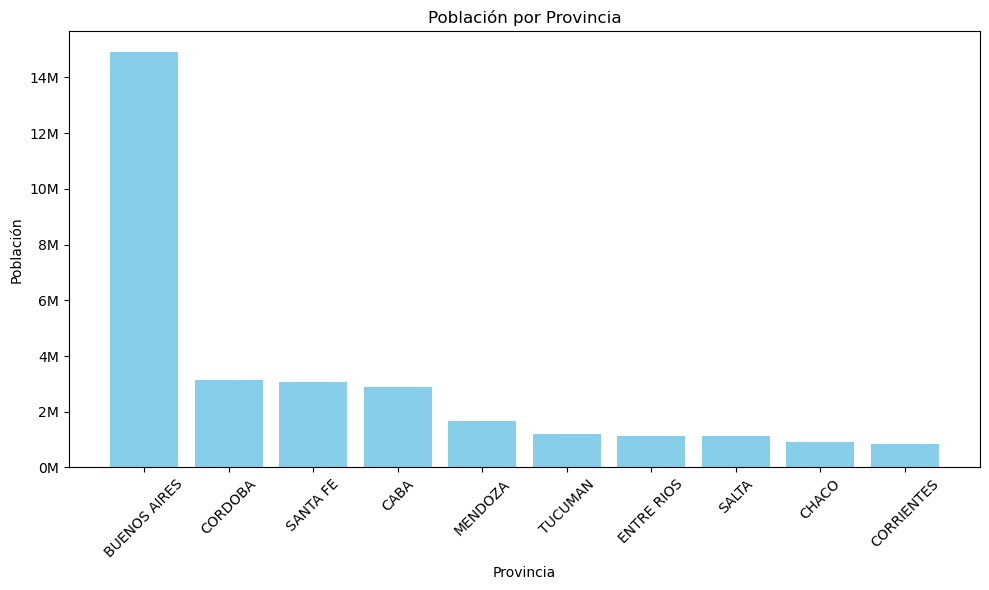

In [22]:
# Gráfico de las 10 provincias con mayor población.

provincias_sup = data_poblacion_top10['Provincia']
poblacion_sup = data_poblacion_top10['Cantidad de Poblacion']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  
plt.bar(provincias_sup, poblacion_sup, color='skyblue') 
plt.title('Población por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Población')

plt.yscale('linear')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)


plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


In [23]:
# Visualizamos las 10 provincias 
data_poblacion_inf10 = poblacion_provincia.sort_values(by = 'Poblacion').head(10)
data_poblacion_inf10.reset_index(inplace=True)

data_poblacion_inf10 = data_poblacion_inf10.rename(columns={'Poblacion': 'Cantidad de Poblacion'})

data_poblacion_inf10

,index,Provincia,Cantidad de Poblacion
0,22,TIERRA DEL FUEGO,125823
1,19,SANTA CRUZ,268436
2,10,LA PAMPA,302570
3,11,LA RIOJA,319248
4,2,CATAMARCA,343343
5,18,SAN LUIS,410669
6,8,FORMOSA,452714
7,4,CHUBUT,490554
8,14,NEUQUEN,522527
9,15,RIO NEGRO,596964


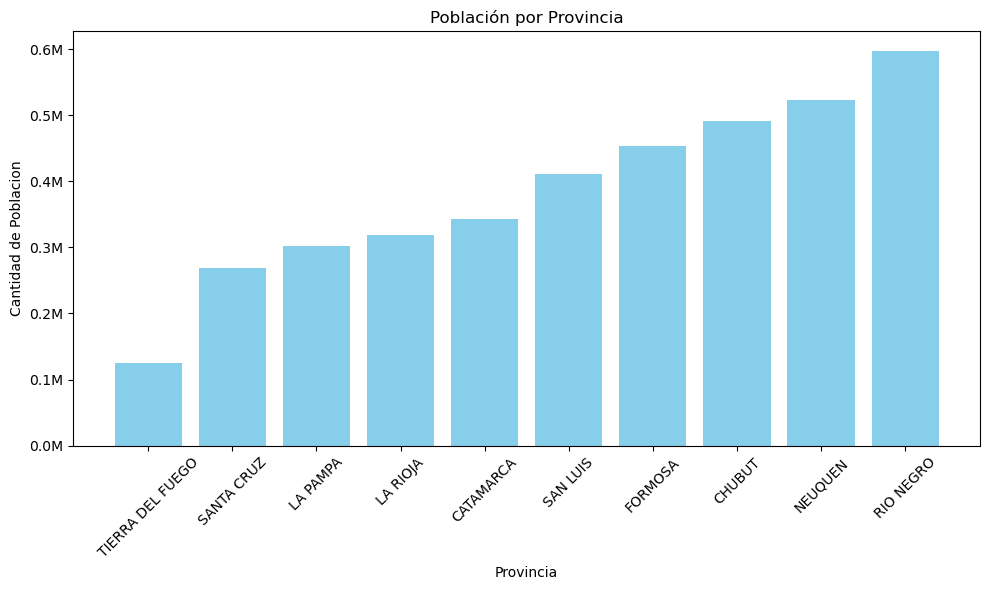

In [24]:
# Gráfico de las 10 provincias con mayor población.

provincias_inf = data_poblacion_inf10['Provincia']
poblacion_inf = data_poblacion_inf10['Cantidad de Poblacion']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  
plt.bar(provincias_inf, poblacion_inf, color='skyblue') 
plt.title('Población por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Poblacion')

plt.yscale('linear')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)


plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

#### Análisis de la variable Partido:

In [25]:
# Cantidad de partidos por provincia

cant_part_provin = data_df.groupby('Provincia')['Partido'].count().reset_index()

cant_part_provin = cant_part_provin.rename(columns={'Partido': 'Cantidad de Partidos'})

cant_part_provin.head(10)

,Provincia,Cantidad de Partidos
0,BUENOS AIRES,900
1,CABA,48
2,CATAMARCA,182
3,CHACO,92
4,CHUBUT,90
5,CORDOBA,556
6,CORRIENTES,78
7,ENTRE RIOS,192
8,FORMOSA,63
9,JUJUY,160


In [26]:
# Cantidad de partidos con el mismo nombre por provincia

cant_part_provin = data_df[['Provincia','Partido']].value_counts().reset_index()
cant_part_provin.head(10)

,Provincia,Partido,0
0,RIO NEGRO,General Roca,70
1,CORDOBA,Santa María,48
2,CORDOBA,San Justo,45
3,SANTA FE,Castellanos,44
4,CORDOBA,Colón,43
5,SAN LUIS,Ayacucho,40
6,CORDOBA,Calamuchita,39
7,ENTRE RIOS,Paraná,36
8,BUENOS AIRES,La Plata,35
9,CORDOBA,Punilla,33


## Merge con distintas tablas de interés

### Merge 1
#### Accesos a Internet fijo por tecnología y localidad
#### Número de accesos al servicio de Internet fijo por tecnología en cada localidad declarada Categoría

##### https://datosabiertos.enacom.gob.ar/dataviews/252830/accesos-a-internet-fijo-por-tecnologia-y-localidad/

In [27]:
# Se carga archivo CSV
to_merge1_a = pd.read_csv('data/AccesosaInternetfijoportecnologíaylocalidad.csv', encoding= "latin-1")


In [28]:
# Se corrige la codificación en columnas específicas
to_merge1_a['Localidad'] = to_merge1_a['Localidad'].str.encode('latin1').str.decode('utf-8')
to_merge1_a['Partido'] = to_merge1_a['Partido'].str.encode('latin1').str.decode('utf-8')

In [29]:
to_merge1_a.sample(10)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
2733,SANTA FE,Iriondo,Serodino,82056130,215,- 0,- 0,12,- 0,- 0,- 0,113,340,NaN
1073,CORDOBA,Pocho,San Gerónimo,14077050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,11,11,NaN
2254,RIO NEGRO,Valcheta,Valcheta,62084060,- 0,- 0,- 0,871,- 0,2,- 0,156,1.029,NaN
1218,CORDOBA,San Justo,Estación Luxardo,14140210,- 0,- 0,- 0,- 0,- 0,- 0,- 0,36,36,NaN
31,BUENOS AIRES,Almirante Brown,Longchamps,6028010,30,9.657,20,14.739,24,- 0,- 0,1,24.471,NaN
495,BUENOS AIRES,Olavarría,Sierra Chica,6595100,- 0,510,- 0,- 0,- 0,- 0,- 0,- 0,510,NaN
2385,SAN JUAN,9 de Julio,Las Chacritas,70063030,- 0,- 0,- 0,- 0,- 0,- 0,- 0,99,99,NaN
1949,MENDOZA,San Carlos,San Carlos,50091060,- 0,167,- 0,- 0,- 0,- 0,- 0,400,567,NaN
1254,CORDOBA,Santa María,OTROS,Sin Datos,- 0,- 0,- 0,- 0,- 0,- 0,- 0,602,602,NaN
3060,SANTIAGO DEL ESTERO,Silípica,Árraga,86189010,1,- 0,- 0,2,- 0,1,- 0,83,87,NaN


#### Se crea una columna concatenada Provincia-Partido-Localidad para el Merge.

In [30]:
# Se agrega la columna Key_Merge
to_merge1_a['Key_Merge'] = to_merge1_a['Provincia'] + '-' + to_merge1_a['Partido'] + '-' + to_merge1_a['Localidad']
to_merge1_a.head(3)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13,Key_Merge
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4.542,- 0,3,- 0,852,- 0,706,6.977,NaN,BUENOS AIRES-25 de Mayo-25 de Mayo
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN,BUENOS AIRES-25 de Mayo-Del Valle
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN,BUENOS AIRES-25 de Mayo-Gobernador Ugarte


In [31]:
# Se corrobora que no haya registros repetidos

to_merge1_a.Key_Merge.value_counts()

BUENOS AIRES-25 de Mayo-25 de Mayo              1
MISIONES-San Pedro-Tobuna                       1
NEUQUEN-Aluminé-Moquehue                        1
NEUQUEN-Aluminé-Villa Pehuenia                  1
NEUQUEN-Añelo-Añelo                             1
                                               ..
CORDOBA-Marcos Juárez-Guatimozín                1
CORDOBA-Marcos Juárez-Inriville                 1
CORDOBA-Marcos Juárez-Isla Verde                1
CORDOBA-Marcos Juárez-Leones                    1
TUCUMAN-Yerba Buena-Yerba Buena - Marcos Paz    1
Name: Key_Merge, Length: 3137, dtype: int64

In [32]:
columnas  = {'ADSL' : 'Cant_ADSL', 'CABLEMODEM' : 'Cant_Cablemodem', 'DIAL UP' : 'Cant_DialUp',  'FIBRA OPTICA': 'Cant_FibraOptica', 'OTROS': 'Cant_Otros', 'SATELITAL': 'Cant_Satelital' , 'WIMAX' : 'Cant_Wimax' , 'WIRELESS' : 'Cant_Wireless', 'Total general' : 'Total' }

to_merge1_a = to_merge1_a.rename(columns=columnas)
to_merge1_a.sample(3)

,Provincia,Partido,Localidad,Link Indec,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Unnamed: 13,Key_Merge
365,BUENOS AIRES,La Plata,Tolosa,6441030,- 0,13.380,- 0,513,- 0,- 0,- 0,- 0,13.893,NaN,BUENOS AIRES-La Plata-Tolosa
2732,SANTA FE,Iriondo,Salto Grande,82056120,493,- 0,- 0,- 0,- 0,- 0,- 0,89,582,NaN,SANTA FE-Iriondo-Salto Grande
810,CHACO,General Donovan,La Verde,22056020,14,- 0,- 0,39,460,2,- 0,- 0,515,NaN,CHACO-General Donovan-La Verde


In [33]:
# Se reemplazan valores

to_merge1_a = to_merge1_a.replace("- 0", 0)
to_merge1_a.sample(5)

,Provincia,Partido,Localidad,Link Indec,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Unnamed: 13,Key_Merge
194,BUENOS AIRES,Exaltación de la Cruz,El Remanso,6266030,397,0,0,335,0,0,0,43,775,NaN,BUENOS AIRES-Exaltación de la Cruz-El Remanso
1066,CORDOBA,Minas,Talaini,14070070,0,0,0,0,0,0,0,23,23,NaN,CORDOBA-Minas-Talaini
483,BUENOS AIRES,Navarro,Navarro,6574030,392,1.919,3,1.814,0,1,0,194,4.323,NaN,BUENOS AIRES-Navarro-Navarro
1009,CORDOBA,General San Martín,Etruria,14042050,31,1,0,0,2,1,0,0,35,NaN,CORDOBA-General San Martín-Etruria
896,CHUBUT,Languiñeo,Colan Conhue,26056030,0,0,0,0,0,1,0,4,5,NaN,CHUBUT-Languiñeo-Colan Conhue


In [34]:
# Se realiza un nuevo DataFrame con las columnas de interes

columnas_deseadas = ["Cant_ADSL", "Cant_Cablemodem", "Cant_DialUp", "Cant_FibraOptica", "Cant_Otros", "Cant_Satelital", "Cant_Wimax", "Cant_Wireless", "Total", "Key_Merge"]

to_merge1_a = to_merge1_a[columnas_deseadas]
to_merge1_a.sample(5)

,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Key_Merge
2244,293,0,2,1.746,0,16,0,0,2.057,RIO NEGRO-San Antonio-Las Grutas
2195,337,0,2,1.296,92,2,0,681,2.410,RIO NEGRO-General Roca-General Fernández Oro
2127,0,0,0,0,0,0,0,35,35,NEUQUEN-Ñorquín-Taquimilán
154,0,0,0,120,0,0,0,0,120,BUENOS AIRES-Coronel de Marina L. Rosales-Vill...
1804,1,202,0,2,0,0,0,5,210,LA RIOJA-Famatina-Famatina


In [35]:
# Se realiza el primer merge para agregar la cuantificacion de los tipos de internet

merge1 = pd.merge(data_df, to_merge1_a, on='Key_Merge', how='inner')


In [36]:
merge1.sample(5)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,...,Key_Merge,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total
1496,SANTA FE,Garay,Santa Rosa de Calchines,3435,1,1,0,0,0,0,...,SANTA FE-Garay-Santa Rosa de Calchines,77,941,0,0,0,0,0,0,1.018
1877,SANTA FE,San Lorenzo,Puerto General San Martín,13243,0,0,0,1,1,1,...,SANTA FE-San Lorenzo-Puerto General San Martín,0,0,0,2.602,215,2,0,13,2.832
2795,MENDOZA,San Rafael,25 de Mayo,1450,0,1,1,0,0,1,...,MENDOZA-San Rafael-25 de Mayo,0,79,1,0,0,0,0,14,94
386,SANTA FE,Caseros,Bigand,4939,1,1,0,0,0,0,...,SANTA FE-Caseros-Bigand,529,1.255,0,0,0,0,0,0,1.784
105,SALTA,Metán,San José de Orquera,155,0,0,0,1,0,0,...,SALTA-Metán-San José de Orquera,0,0,0,15,0,0,0,0,15


In [37]:
# Se visualizan los nombres de las columnas
merge1.columns


Index(['Provincia', 'Partido', 'Localidad', 'Poblacion', 'ADSL', 'Cablemodem',
       'Dial Up', 'Fibra optica', 'Satelital', 'Wireless', 'Telefonia Fija',
       '3G', '4G', 'Link', 'Latitud', 'Longitud', 'Key_Merge', 'Cant_ADSL',
       'Cant_Cablemodem', 'Cant_DialUp', 'Cant_FibraOptica', 'Cant_Otros',
       'Cant_Satelital', 'Cant_Wimax', 'Cant_Wireless', 'Total'],
      dtype='object')

In [38]:
# Se visualiza la cantidad de registros y la cantidad de columnas
merge1.shape

(2974, 26)

## Merge 2
#### Se agrega los datos de poblacion por provincia al DataFrame de base.

In [39]:
merge1.sample(2)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,...,Key_Merge,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total
605,CATAMARCA,Capayán,Capayán,636,0,0,0,0,1,0,...,CATAMARCA-Capayán-Capayán,0,0,0,0,0,1,0,0,1
268,CORDOBA,San Justo,Miramar,2023,0,1,0,0,0,1,...,CORDOBA-San Justo-Miramar,0,1.038,0,0,0,0,0,116,1.154


In [40]:
# Se agrega una columna con la poblacion total de la provincia de cada registro utilizando el diccionario "diccionario_poblacion" construido previamente

merge2 = merge1
merge2['Pob_prov'] = merge2['Provincia']
merge2['Pob_prov'] = merge2['Provincia'].map(diccionario_poblacion)
merge2 = merge2.rename(columns={'Pob_prov': 'Pob_prov_2020'})
merge2.sample(5)

,Provincia,Partido,Localidad,Poblacion,ADSL,Cablemodem,Dial Up,Fibra optica,Satelital,Wireless,...,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Pob_prov_2020
1032,BUENOS AIRES,Carmen de Areco,Tres Sargentos,391,0,0,0,0,0,1,...,0,0,0,0,0,0,0,107,107,14911542
2340,TUCUMAN,Simoca,Monteagudo,880,0,0,0,0,0,1,...,0,0,0,0,0,0,0,17,17,1210114
2084,RIO NEGRO,General Roca,Cervantes,3252,0,1,0,0,1,1,...,0,1,0,0,0,2,0,268,271,596964
126,SANTA FE,Las Colonias,San Agustín,630,0,0,0,0,0,1,...,0,0,0,0,0,0,0,83,83,3055611
1584,LA PAMPA,Realicó,Damián Maisonave (Est. Simson),300,0,0,0,1,0,1,...,0,0,0,2,0,0,0,109,111,302570


In [41]:
# Se verifica el total de registros y columnas
merge2.shape

(2974, 27)

### Merge 3
#### Accesos a internet por cada 100 habitantes por provincia, año y trimestre
#### Accesos a internet por cada 100 hogares por provincia, año y trimestre

In [42]:
# Se carga archivo CSV
to_merge3_hab = pd.read_csv('data/Internet_Penetracion_hab_prov.csv', encoding= "latin-1")
to_merge3_hog = pd.read_csv('data/Internet_Penetracion_hog_prov.csv', encoding= "latin-1")

In [43]:
to_merge3_hab.sample(5)

,AÃ±o,Trimestre,Provincia,Accesos por cada 100 hab
427,2018,3,Santa Cruz,10
644,2016,2,Santa Fe,16
840,2014,1,Buenos Aires,17
598,2016,4,Tierra Del Fuego,21
716,2015,3,Santa Fe,16


In [44]:
to_merge3_hog.sample(5)

,AÃ±o,Trimestre,Provincia,Accesos por cada 100 hogares
241,2020,2,Capital Federal,"106,41"
734,2015,2,NeuquÃ©n,"53,12"
310,2019,4,Tierra Del Fuego,"79,7"
610,2016,3,La Pampa,"61,73"
620,2016,3,Santa Fe,"52,67"


In [45]:
# Se corrigen los encoding
to_merge3_hog['Provincia'] = to_merge3_hog['Provincia'].str.encode('latin1').str.decode('utf-8')
to_merge3_hab['Provincia'] = to_merge3_hab['Provincia'].str.encode('latin1').str.decode('utf-8')

# Se corrige el nombre del campo año
to_merge3_hab = to_merge3_hab.rename(columns={'AÃ±o': 'Year', 'Accesos por cada 100 hab': 'Acc_cada_100_hab'})
to_merge3_hog = to_merge3_hog.rename(columns={'AÃ±o': 'Year', 'Accesos por cada 100 hogares': 'Acc_cada_100_hog'})

# Se pasan a mayusculas todos los registros del campo Provincia en vistas a realizar el merge por provincia
to_merge3_hog['Provincia'] = to_merge3_hog['Provincia'].str.upper()
to_merge3_hab['Provincia'] = to_merge3_hab['Provincia'].str.upper()

# Se corrigen las tildes

a_reemplazar = {'TUCUMÁN': 'TUCUMAN', 'CÓRDOBA': 'CORDOBA' , 'NEUQUÉN': 'NEUQUEN', 'ENTRE RÍOS': 'ENTRE RIOS', 'RÍO NEGRO': 'RIO NEGRO'}

to_merge3_hog['Provincia'] = to_merge3_hog['Provincia'].replace(a_reemplazar)
to_merge3_hab['Provincia'] = to_merge3_hab['Provincia'].replace(a_reemplazar)


# Se modifican los formatos para realizar la concatenación de columnas "KEY"

to_merge3_hab['Year'] = to_merge3_hab['Year'].astype(str)
to_merge3_hab['Trimestre'] = to_merge3_hab['Trimestre'].astype(str)

to_merge3_hog['Year'] = to_merge3_hog['Year'].astype(str)
to_merge3_hog['Trimestre'] = to_merge3_hog['Trimestre'].astype(str)

# Se concatena una serie de datos en "KEY"
to_merge3_hab['Key'] = to_merge3_hab['Year'] + '-' + to_merge3_hab['Trimestre'] + '-' + to_merge3_hab['Provincia']
to_merge3_hog['Key'] = to_merge3_hog['Year'] + '-' + to_merge3_hog['Trimestre'] + '-' + to_merge3_hog['Provincia']

In [46]:
# Se Verifica que el procesamiento sea correcto
to_merge3_hab.sample(5)

,Year,Trimestre,Provincia,Acc_cada_100_hab,Key
4,2022,4,CHUBUT,26,2022-4-CHUBUT
144,2021,2,BUENOS AIRES,23,2021-2-BUENOS AIRES
365,2019,1,CORDOBA,20,2019-1-CORDOBA
165,2021,2,SANTIAGO DEL ESTERO,12,2021-2-SANTIAGO DEL ESTERO
788,2014,4,SANTA FE,16,2014-4-SANTA FE


In [47]:
# Se Verifica que el procesamiento sea correcto
to_merge3_hog.sample(5)

,Year,Trimestre,Provincia,Acc_cada_100_hog,Key
822,2014,2,CORRIENTES,"22,58",2014-2-CORRIENTES
683,2015,4,LA RIOJA,"17,32",2015-4-LA RIOJA
323,2019,3,LA RIOJA,"47,94",2019-3-LA RIOJA
663,2016,1,RIO NEGRO,"45,84",2016-1-RIO NEGRO
182,2021,1,NEUQUEN,"66,84",2021-1-NEUQUEN


In [48]:
# Se realiza el merge de las 2 tablas con información de interes
to_merge3= pd.merge(to_merge3_hog, to_merge3_hab, on='Key', how='right')
to_merge3.sample(10)

,Year_x,Trimestre_x,Provincia_x,Acc_cada_100_hog,Key,Year_y,Trimestre_y,Provincia_y,Acc_cada_100_hab
644,2016,2,SANTA FE,"52,44",2016-2-SANTA FE,2016,2,SANTA FE,16
836,2014,2,SANTA FE,"48,39",2014-2-SANTA FE,2014,2,SANTA FE,15
125,2021,3,CORDOBA,"81,28",2021-3-CORDOBA,2021,3,CORDOBA,25
259,2020,2,SANTA CRUZ,"35,79",2020-2-SANTA CRUZ,2020,2,SANTA CRUZ,11
735,2015,2,RIO NEGRO,"45,98",2015-2-RIO NEGRO,2015,2,RIO NEGRO,14
348,2019,2,MENDOZA,"40,75",2019-2-MENDOZA,2019,2,MENDOZA,11
271,2020,1,ENTRE RIOS,"56,12",2020-1-ENTRE RIOS,2020,1,ENTRE RIOS,17
261,2020,2,SANTIAGO DEL ESTERO,"43,47",2020-2-SANTIAGO DEL ESTERO,2020,2,SANTIAGO DEL ESTERO,11
295,2019,4,ENTRE RIOS,"57,99",2019-4-ENTRE RIOS,2019,4,ENTRE RIOS,17
679,2015,4,ENTRE RIOS,"44,11",2015-4-ENTRE RIOS,2015,4,ENTRE RIOS,13


In [49]:
# Se seleccionan y se renombran las columnas de interes

to_merge3 = to_merge3[['Year_x', 'Trimestre_x', 'Provincia_x', 'Acc_cada_100_hog', 'Acc_cada_100_hab']]
to_merge3 = to_merge3.rename(columns={'Year_x':'Year','Trimestre_x':'Trimestre','Provincia_x': 'Provincia'})
to_merge3.sample(10)

,Year,Trimestre,Provincia,Acc_cada_100_hog,Acc_cada_100_hab
363,2019,1,CHACO,"32,64",9
304,2019,4,SALTA,"50,35",12
458,2018,1,CATAMARCA,"32,79",8
750,2015,1,CORRIENTES,"28,95",8
820,2014,2,CHUBUT,"41,41",13
202,2020,4,LA PAMPA,"81,77",27
29,2022,3,CORDOBA,"88,31",27
307,2019,4,SANTA CRUZ,"36,71",11
244,2020,2,CHUBUT,"57,34",18
513,2017,3,JUJUY,"22,65",6


In [50]:
# Se realiza el Merge con el Merge anterior llamado "merge2" y el Merge de accesos cada 100 habitantes y cada 100 hogares.
merge3= pd.merge(to_merge3, merge2, on='Provincia', how='inner')
merge3.sample(5)

,Year,Trimestre,Provincia,Acc_cada_100_hog,Acc_cada_100_hab,Partido,Localidad,Poblacion,ADSL,Cablemodem,...,Cant_ADSL,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Pob_prov_2020
1905,2022,2,BUENOS AIRES,"77,58",26,Pehuajó,Inocencio Sosa,31,0,0,...,0,0,0,0,0,0,0,3,3,14911542
7125,2020,1,BUENOS AIRES,"64,33",21,Pergamino,Guerrico,774,0,1,...,0,61,0,0,0,1,0,54,116,14911542
54226,2021,4,JUJUY,"56,92",15,Tumbaya,Bárcena,139,0,0,...,0,0,0,0,0,0,0,111,111,628141
85696,2016,2,SAN LUIS,"9,6",3,Libertador Grl. San Martín,San Martín,697,1,0,...,1,0,1,75,0,0,0,363,440,410669
57871,2020,2,LA PAMPA,"76,1",25,Guatraché,Alpachiri,1759,0,0,...,0,0,0,2,0,1,0,0,3,302570


In [51]:
merge3.shape

(107064, 31)

In [52]:
merge3.columns

Index(['Year', 'Trimestre', 'Provincia', 'Acc_cada_100_hog',
       'Acc_cada_100_hab', 'Partido', 'Localidad', 'Poblacion', 'ADSL',
       'Cablemodem', 'Dial Up', 'Fibra optica', 'Satelital', 'Wireless',
       'Telefonia Fija', '3G', '4G', 'Link', 'Latitud', 'Longitud',
       'Key_Merge', 'Cant_ADSL', 'Cant_Cablemodem', 'Cant_DialUp',
       'Cant_FibraOptica', 'Cant_Otros', 'Cant_Satelital', 'Cant_Wimax',
       'Cant_Wireless', 'Total', 'Pob_prov_2020'],
      dtype='object')

### Merge 4
#### Salarios promedio y mediano, por provincia 


In [53]:
# Se carga archivo CSV
to_merge4_a = pd.read_csv('data/w_mean_todos.csv', encoding= "latin-1")

In [54]:
to_merge4_a

,fecha,zona_prov,w_mean
0,2013-01-01,BUENOS AIRES,7776
1,2013-01-01,CAPITAL FEDERAL,9675
2,2013-01-01,CATAMARCA,6416
3,2013-01-01,CHACO,6531
4,2013-01-01,CHUBUT,11452
...,...,...,...
2995,2023-05-01,SANTA CRUZ,555954
2996,2023-05-01,SANTA FE,306596
2997,2023-05-01,SANTIAGO DEL ESTERO,193229
2998,2023-05-01,TIERRA DEL FUEGO,449830


In [55]:
to_merge4_a['fecha'] = pd.to_datetime(to_merge4_a['fecha'])

In [56]:
to_merge4_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      3000 non-null   datetime64[ns]
 1   zona_prov  3000 non-null   object        
 2   w_mean     3000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 70.4+ KB


In [57]:
to_merge4_b = to_merge4_a.groupby([to_merge4_a['fecha'].dt.year, 'zona_prov'])['w_mean'].sum().reset_index()
to_merge4_b

,fecha,zona_prov,w_mean
0,2013,BUENOS AIRES,107675
1,2013,CAPITAL FEDERAL,132192
2,2013,CATAMARCA,90296
3,2013,CHACO,92725
4,2013,CHUBUT,157507
...,...,...,...
259,2023,SANTA CRUZ,2487857
260,2023,SANTA FE,1354556
261,2023,SANTIAGO DEL ESTERO,859482
262,2023,TIERRA DEL FUEGO,1937739


In [58]:
# Se extraen los datos del 2013 y 2023
to_merge4_c = to_merge4_b[(to_merge4_b['fecha'] >2013) & (to_merge4_b['fecha'] < 2023)]
to_merge4_c.reset_index(inplace=True)
to_merge4_c

,index,fecha,zona_prov,w_mean
0,24,2014,BUENOS AIRES,143189
1,25,2014,CAPITAL FEDERAL,174206
2,26,2014,CATAMARCA,116585
3,27,2014,CHACO,122756
4,28,2014,CHUBUT,216384
...,...,...,...,...
211,235,2022,SANTA CRUZ,3884898
212,236,2022,SANTA FE,2065082
213,237,2022,SANTIAGO DEL ESTERO,1257118
214,238,2022,TIERRA DEL FUEGO,2935993


In [59]:
to_merge4_c.columns


Index(['index', 'fecha', 'zona_prov', 'w_mean'], dtype='object')

In [60]:
to_merge4_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      216 non-null    int64 
 1   fecha      216 non-null    int64 
 2   zona_prov  216 non-null    object
 3   w_mean     216 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.9+ KB


In [61]:
to_merge4_c.sample(10)

,index,fecha,zona_prov,w_mean
198,222,2022,CORRIENTES,1626563
95,119,2017,TUCUMAN,233579
162,186,2020,SAN LUIS,764124
153,177,2020,JUJUY,536968
154,178,2020,LA PAMPA,871378
34,58,2015,LA PAMPA,192639
111,135,2018,RIO NEGRO,393384
103,127,2018,ENTRE RIOS,348653
196,220,2022,CHUBUT,3012711
10,34,2014,LA PAMPA,148708


In [70]:
# Se modifican los formatos para realizar la concatenación de columnas "KEY"

to_merge4_c['fecha'] = to_merge4_c['fecha'].astype(str)
to_merge4_c['zona_prov'] = to_merge4_c['zona_prov'].astype(str)


In [93]:
# Se realiza la concatenación de columnas "Key_w_year_prov"
to_merge4_c['Key_w_year_prov'] = to_merge4_c['fecha'] + '-' + to_merge4_c['zona_prov']
to_merge4_c = to_merge4_c[['fecha', 'zona_prov', 'w_mean', 'Key_w_year_prov']]
to_merge4_c

,fecha,zona_prov,w_mean,Key_w_year_prov
0,2014,BUENOS AIRES,143189,2014-BUENOS AIRES
1,2014,CAPITAL FEDERAL,174206,2014-CAPITAL FEDERAL
2,2014,CATAMARCA,116585,2014-CATAMARCA
3,2014,CHACO,122756,2014-CHACO
4,2014,CHUBUT,216384,2014-CHUBUT
...,...,...,...,...
211,2022,SANTA CRUZ,3884898,2022-SANTA CRUZ
212,2022,SANTA FE,2065082,2022-SANTA FE
213,2022,SANTIAGO DEL ESTERO,1257118,2022-SANTIAGO DEL ESTERO
214,2022,TIERRA DEL FUEGO,2935993,2022-TIERRA DEL FUEGO


In [94]:
# Al DF merge 3 se realiza la concatenación de columnas "Key_w_year_prov", para que coincida con to_merge4_c

# Se modifican los formatos para realizar la concatenación de columnas "Key_w_year_prov"
merge3['Year'] = merge3['Year'].astype(str)

# Se realiza la concatenacion para la creacion de la columna "Key_w_year_prov"
merge3['Key_w_year_prov'] = merge3['Year'] + '-' + merge3['Provincia']
merge3

,Year,Trimestre,Provincia,Acc_cada_100_hog,Acc_cada_100_hab,Partido,Localidad,Poblacion,ADSL,Cablemodem,...,Cant_Cablemodem,Cant_DialUp,Cant_FibraOptica,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Pob_prov_2020,Key_w_year_prov
0,2022,4,BUENOS AIRES,"78,94",27,9 de Julio,Dudignac,2670,0,0,...,0,1,0,0,0,0,463,464,14911542,2022-BUENOS AIRES
1,2022,4,BUENOS AIRES,"78,94",27,9 de Julio,Patricios,745,1,0,...,0,0,0,0,0,0,0,81,14911542,2022-BUENOS AIRES
2,2022,4,BUENOS AIRES,"78,94",27,Adolfo Alsina,Carhué,9660,1,0,...,0,1,1.417,1,0,0,283,2.482,14911542,2022-BUENOS AIRES
3,2022,4,BUENOS AIRES,"78,94",27,Adolfo Alsina,Colonia San Miguel Arcángel,563,0,0,...,0,0,208,0,0,0,0,208,14911542,2022-BUENOS AIRES
4,2022,4,BUENOS AIRES,"78,94",27,Azul,Azul,55728,1,1,...,13.918,51,56,65,2,0,1.145,17.661,14911542,2022-BUENOS AIRES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107059,2014,1,TUCUMAN,"33,42",8,Monteros,Capitán Cáceres,513,0,0,...,0,0,0,0,0,0,40,40,1210114,2014-TUCUMAN
107060,2014,1,TUCUMAN,"33,42",8,Monteros,Monteros,23274,1,0,...,0,0,20,0,0,0,226,2.052,1210114,2014-TUCUMAN
107061,2014,1,TUCUMAN,"33,42",8,Monteros,Pueblo Independencia,3530,1,0,...,0,0,0,0,0,0,0,4,1210114,2014-TUCUMAN
107062,2014,1,TUCUMAN,"33,42",8,Monteros,Río Seco,5131,1,0,...,0,0,6,0,0,0,330,349,1210114,2014-TUCUMAN


In [95]:
merge4 = pd.merge(merge3, to_merge4_c, on='Key_w_year_prov', how='inner')
merge4.sample(5)

,Year,Trimestre,Provincia,Acc_cada_100_hog,Acc_cada_100_hab,Partido,Localidad,Poblacion,ADSL,Cablemodem,...,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Pob_prov_2020,Key_w_year_prov,fecha,zona_prov,w_mean
21255,2014,4,BUENOS AIRES,"56,09",17,General Las Heras,Lozano,0,0,0,...,0,1,0,0,1,14911542,2014-BUENOS AIRES,2014,BUENOS AIRES,143189
54364,2021,2,JUJUY,"56,18",14,Susques,El Toro,121,0,0,...,0,4,0,0,24,628141,2021-JUJUY,2021,JUJUY,796556
104780,2022,4,TUCUMAN,"61,04",15,Lules,Ingenio San Pablo,9620,1,0,...,0,0,0,187,1.137,1210114,2022-TUCUMAN,2022,TUCUMAN,1369517
11762,2018,2,BUENOS AIRES,"62,78",20,Avellaneda,Villa Domínico,61273,1,1,...,11,0,0,626,16.578,14911542,2018-BUENOS AIRES,2018,BUENOS AIRES,414561
80261,2014,2,SALTA,"28,91",7,Rivadavia,Santa Victoria Este,1809,1,0,...,10,1,0,41,71,1117163,2014-SALTA,2014,SALTA,116634


In [96]:
merge4

,Year,Trimestre,Provincia,Acc_cada_100_hog,Acc_cada_100_hab,Partido,Localidad,Poblacion,ADSL,Cablemodem,...,Cant_Otros,Cant_Satelital,Cant_Wimax,Cant_Wireless,Total,Pob_prov_2020,Key_w_year_prov,fecha,zona_prov,w_mean
0,2022,4,BUENOS AIRES,"78,94",27,9 de Julio,Dudignac,2670,0,0,...,0,0,0,463,464,14911542,2022-BUENOS AIRES,2022,BUENOS AIRES,2136200
1,2022,4,BUENOS AIRES,"78,94",27,9 de Julio,Patricios,745,1,0,...,0,0,0,0,81,14911542,2022-BUENOS AIRES,2022,BUENOS AIRES,2136200
2,2022,4,BUENOS AIRES,"78,94",27,Adolfo Alsina,Carhué,9660,1,0,...,1,0,0,283,2.482,14911542,2022-BUENOS AIRES,2022,BUENOS AIRES,2136200
3,2022,4,BUENOS AIRES,"78,94",27,Adolfo Alsina,Colonia San Miguel Arcángel,563,0,0,...,0,0,0,0,208,14911542,2022-BUENOS AIRES,2022,BUENOS AIRES,2136200
4,2022,4,BUENOS AIRES,"78,94",27,Azul,Azul,55728,1,1,...,65,2,0,1.145,17.661,14911542,2022-BUENOS AIRES,2022,BUENOS AIRES,2136200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107059,2014,1,TUCUMAN,"33,42",8,Monteros,Capitán Cáceres,513,0,0,...,0,0,0,40,40,1210114,2014-TUCUMAN,2014,TUCUMAN,106227
107060,2014,1,TUCUMAN,"33,42",8,Monteros,Monteros,23274,1,0,...,0,0,0,226,2.052,1210114,2014-TUCUMAN,2014,TUCUMAN,106227
107061,2014,1,TUCUMAN,"33,42",8,Monteros,Pueblo Independencia,3530,1,0,...,0,0,0,0,4,1210114,2014-TUCUMAN,2014,TUCUMAN,106227
107062,2014,1,TUCUMAN,"33,42",8,Monteros,Río Seco,5131,1,0,...,0,0,0,330,349,1210114,2014-TUCUMAN,2014,TUCUMAN,106227
